# Tankage

## Overview

Copyright 2023 Moran Innovation LLC

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

CryoFM™ is a trademark of Moran Innovation LLC. All rights reserved.

### Usage Notes

**HOW TO USE THIS INTERACTIVE NOTEBOOK:**
* Use the table of contents icon and sidebar at the left to navigate to the topics of interest.
* Change any of the input values and run the associated cell code.
* If an interactive Binder web browser session is being used, the original file will not be altered. Therefore, if you wish to retain any modifications you make, save your file to local memory on your device.

**CAUTION:** None of the code cells run automatically. The user must manually run selected code cells in sequence to achieve the desired results. Default units are SI.

**REFERENCE REPORT AND TRAINING:** The reference report for this interactive notebook is "Cryogenic fluid management of liquid hydrogen, oxygen, and methane: Part 1 - passive technologies, systems, and operations",  Moran Innovation LLC, 2023. An online version of the report and training videos based on the content can be found here: https://sites.google.com/view/matthewemoran/training#h.ir8xm9d8wn6h.

## Material Properties

Many material properties are a nonlinear as a function of temperature in the cryogenic range.
Mechanical properties that can vary significantly at low temperature include [Flynn, Cryogenic Engineering, 2nd ed., 2005]:
* Yield and ultimate strength: generally increases at lower temperatures for most solids
* Ductility: some materials remain ductile (e.g., aluminum alloys, austenitic stainless steel
with > 7% nickel, most face-centered cubic metals); while some materials become brittle
(carbon steel, most plastics, most body-centered cubic metals)
* Elastic modulus: varies
* Fatigue strength: varies

Thermal properties are highly temperature dependent at cryogenic temperatures including
thermal conductivity and specific heat. Accurate analysis of conduction heat transfer and thermal
energy capacitance require integration of these properties over the relevant temperature range.

NIST provides an online calculator for this purpose at: https://trc.nist.gov/cryogenics/calculators/graphcalc.html. Curve fits of data or published integrals for selected materials can also be used.

## Heat Loads

### Solid Thermal Conduction

In [3]:
# Inputs
description = 'Stainless steel 304 pipe: 110 K to 300 K'
shape_factor = 0.208  # m, area divided by length or equiv for other shapes
cond_integ = 2433  # W/m, conduction integral for temp range from table or NIST

# Solid conduction heat transfer
cond_ht = shape_factor * cond_integ
print(description)
print("Conduction heat transfer =", "{:.4e}".format(cond_ht), "W")

Stainless steel 304 pipe: 110 K to 300 K
Conduction heat transfer = 5.0606e+02 W


### Solid Thermal Capacitance (heat absorbed or dissipated)

In [4]:
# Inputs
description = 'Stainless steel 304 structure: chilldown from 300 K to 110 K'
mass = 1.  # kg, material mass
cp_integ = 78136 # J/kg-K, specific heat integral in temp range from NIST

# Solid heat absorbed or dissipated
heat_out = mass * cp_integ/1000  # kJ, heat in (+) or out(-)
print(description)
print("Heat absorbed or dissipated =", "{:.4e}".format(heat_out), "kJ")

Stainless steel 304 structure: chilldown from 300 K to 110 K
Heat absorbed or dissipated = 7.8136e+01 kJ


### Insulation Heat Transfer

In [5]:
# Inputs
description = 'MLI at 0.01 mtorr'
conductivity = 3.E-5  # W/m-K
thickness = 2.54E-2  # m
area = 1  # m^2
temp_hot = 300  # K
temp_cold = 110  # K
degrad_factor = 2.0  # degradation due to seams, penetrations, etc.

# Insulation thermal performance based on apparent thermal conductivity
heat_leak = conductivity * area / thickness * (temp_hot - temp_cold) * \
            degrad_factor
print(description)
print("Estimated heat leak through MLI=", "{:.4e}".format(heat_leak), "W")

MLI at 0.01 mtorr
Estimated heat leak through MLI= 4.4882e-01 W


### Thermal Radiation (Gray Diffuse)

In [6]:
S_B = 5.67037441918e-8  # W/m^2-K^4; Stefan-Boltzmann constant

# Inputs
description = 'Gray diffuse radiative flux between parallel infinite plates'
temp1 = 300  # K, temperature of surface 1
temp2 = 110  # K, temperature of surface 2
emiss1 = 0.3  # emissivity of surface 1
emiss2 = 0.3  # emissivity of surface 2

# Net gray diffuse radiation between two parallel infinite plates
heat_flux = S_B * (temp1**4 - temp2**4)/(1/emiss1 + 1/emiss2 -1)
print(description)
print("Net radiation heat flux", "{:.4e}".format(heat_flux), "W/m^2")

Gray diffuse radiative flux between parallel infinite plates
Net radiation heat flux 7.9588e+01 W/m^2


## Tank Sizing

### Tank volume required

In [1]:
import CoolProp.CoolProp as cp

# Inputs
description = 'Tank volume based on max pressure when full'
fluid = 'Oxygen'
mass_liquid = 1.49E5  # kg, liquid mass required
ullage_fraction = 0.05  # minimum ullage gas by volume required
press_tank = 5.0E5  # Pa, max pressure when tank is full

# Estimate tank volume required based on conditions
density_liquid = cp.PropsSI('D', 'P', press_tank, 'Q', 0, fluid)
volume_tank = mass_liquid / density_liquid / (1 - ullage_fraction)
print(description)
print("Required tank volume =", "{:.4e}".format(volume_tank), "m^3")

Tank volume based on max pressure when full
Required tank volume = 1.5047e+02 m^3


### Tank Shape and Dimensions

In [9]:
import math

# Inputs (all dimensions are inside)
volume_tank = 150.50586  # m^3, required tank volume
diam_cyl = 5.0  # m, diameter for cylindrical tanks
oblate_height = 4.491  # height of oblate spheroid tank
ellip_ratio = 2.0  # radius ratio for elliptical ends (R/r > 1)
print('Tank volume of', "{:.4e}".format(volume_tank), "m^2 options:")

# Spherical tank
diam_inside = 2. * (volume_tank * 3./4. / math.pi)**(1./3.)
print("* Sphere with an internal diameter =","{:.4e}".format(diam_inside), "m")

# Oblate spheroid tank
diam = 2 * math.sqrt(3 * volume_tank / 4 / math.pi / (oblate_height/2))
oblate_ratio = oblate_height / diam
print("* Oblate spheroid with internal diameter =","{:.4e}".format(diam), "m")
print("    and an internal height of =","{:.4e}".format(oblate_height), "m")
print("    with a height-to-diameter ratio of =","{:.2f}".format(oblate_ratio))

# Cylindrical tank (hemispherical ends)
length_cyl = volume_tank / math.pi / (diam_cyl/2)**2 - 4./3. * (diam_cyl/2)
length_tot = length_cyl + 2 * (diam_cyl/2)  # cylinder plus hemi ends
ld_ratio = length_tot / diam_cyl
print("* Cylinder with hemispherical ends and internal diameter =", "{:.4e}"\
      .format(diam_cyl), "m")
print("    and cylindrical length of =","{:.4e}".format(length_cyl), "m")
print("    for a total inside length of =","{:.4e}".format(length_tot), "m")
print("    with a length-to-diameter ratio of =","{:.2f}".format(ld_ratio))

# Cylindrical (elliptical ends)
length_cyl = volume_tank / math.pi / (diam_cyl/2)**2 - 4./3. * \
            (diam_cyl/2 / ellip_ratio)
length_tot = length_cyl + 2 * (diam_cyl/2 / ellip_ratio)  # cylinder plus ends
ld_ratio = length_tot / diam_cyl
print("* Cylinder with elliptical ends and internal diameter =", "{:.4e}"\
      .format(diam_cyl), "m")
print("    and cylindrical length of =","{:.4e}".format(length_cyl), "m")
print("    for a total inside length of =","{:.4e}".format(length_tot), "m")
print("    with a length-to-diameter ratio of =","{:.2f}".format(ld_ratio))

# Cylindrical (hemispherical ends, one inverted for common bulkhead)
length_cyl = volume_tank / math.pi / (diam_cyl/2)**2
length_tot = length_cyl + (diam_cyl/2)  # cylinder plus non-inverted end
ld_ratio = length_tot / diam_cyl
print("* Cylinder with hemispherical ends (one inverted for common bulkhead)")
print("    internal diameter =", "{:.4e}".format(diam_cyl), "m")
print("    and cylindrical length of =","{:.4e}".format(length_cyl), "m")
print("    for a total inside length of =","{:.4e}".format(length_tot), "m")
print("    with a length-to-diameter ratio of =","{:.2f}".format(ld_ratio))

# Cylindrical (elliptical ends, one inverted for common bulkhead)
length_cyl = volume_tank / math.pi / (diam_cyl/2)**2
length_tot = length_cyl + (diam_cyl/2/ellip_ratio)  # cylinder plus non-inverted end
ld_ratio = length_tot / diam_cyl
print("* Cylinder with elliptical ends (one inverted for common bulkhead)")
print("    internal diameter =", "{:.4e}".format(diam_cyl), "m")
print("    and cylindrical length of =","{:.4e}".format(length_cyl), "m")
print("    for a total inside length of =","{:.4e}".format(length_tot), "m")
print("    with a length-to-diameter ratio of =","{:.2f}".format(ld_ratio))

Tank volume of 1.5051e+02 m^2 options:
* Sphere with an internal diameter = 6.5996e+00 m
* Oblate spheroid with internal diameter = 8.0003e+00 m
    and an internal height of = 4.4910e+00 m
    with a height-to-diameter ratio of = 0.56
* Cylinder with hemispherical ends and internal diameter = 5.0000e+00 m
    and cylindrical length of = 4.3319e+00 m
    for a total inside length of = 9.3319e+00 m
    with a length-to-diameter ratio of = 1.87
* Cylinder with elliptical ends and internal diameter = 5.0000e+00 m
    and cylindrical length of = 5.9985e+00 m
    for a total inside length of = 8.4985e+00 m
    with a length-to-diameter ratio of = 1.70
* Cylinder with hemispherical ends (one inverted for common bulkhead)
    internal diameter = 5.0000e+00 m
    and cylindrical length of = 7.6652e+00 m
    for a total inside length of = 1.0165e+01 m
    with a length-to-diameter ratio of = 2.03
* Cylinder with elliptical ends (one inverted for common bulkhead)
    internal diameter = 5.0000e+

### Minimum Wall Thickness

In [7]:
import math

#Inputs
tank_shape = 'sphere' # sphere or cylinder
press_internal = 5.0e5  # Pa, internal tank pressure
press_external = 0.0e5  # Pa, external pressure (vacuum jacket ~ 0)
radius_tank = 3.3  # m, spherical or cylindrical tank radius
stress_allowable = 5.05e8  # Pa, maximum allowable stress for methodology used
safety_factor_t = 1.5  # for tensile load based allowable stress
safety_factor_b= 4.0  # for buckling load
mod_elasticity = 193.e9  # Pa, modulus of elasticity for tank material
poisson = 0.29  # Poisson's ratio for tank material
length = 0.3  # m, length of cylinder (or buckling support spacing)

# Check failure mode (tensile or buckling)
if press_internal - press_external >= 0.:  # tensile failure mode
    failure_mode = "tensile"
    if tank_shape == 'sphere':
        wall_thickness = safety_factor_t * (press_internal - press_external)\
                        * radius_tank / (2 * stress_allowable)
    elif tank_shape == 'cylinder':
        wall_thickness = safety_factor_t * (press_internal - press_external)\
                        * radius_tank / stress_allowable
    else: print("Error: tank shape must be sphere or cylinder")
else:  # buckling failure mode (external pressure is greater than internal)
     failure_mode = "buckling"
     if tank_shape == 'sphere':
        wall_thickness = math.sqrt(safety_factor_b * (press_internal
                         - press_external) * (3 * (1 - poisson**2))**0.5 / (-2
                         * mod_elasticity)) * radius_tank
     elif tank_shape == 'cylinder':
        thickness_short = safety_factor_b * (press_external - press_internal)\
                          * radius_tank / stress_allowable
        thickness_long = safety_factor_b * (4 * radius_tank**3 * (press_external
                         - press_internal) * (1 - poisson**2) / mod_elasticity
                         )**(1./3.)
        thickness_inter = safety_factor_b * ((2 * radius_tank)**1.5 * 
                         (press_external - press_internal) * length / (2.6
                         * mod_elasticity))**(1/2.5)
        length_crit = 1.11 * 2 * radius_tank * math.sqrt(2 * radius_tank
                                                         / thickness_long)
        if length > length_crit:
            wall_thickness = thickness_long
        else:
            wall_thickness = max(thickness_inter, thickness_short)
     else: print("Error: tank shape must be sphere or cylinder")
print("Failure mode is:", failure_mode)
print("Minimum wall thickness is:", "{:.3e}".format(wall_thickness), "m")

Failure mode is: tensile
Minimum wall thickness is: 2.450e-03 m


### Maximum Pressure Differential

In [8]:
import math

#Inputs
tank_shape = 'sphere' # sphere or cylinder
failure_mode = 'tensile'  # tensile or buckling (determines equation used)
wall_thickness = 2.45e-3  #m, wall thickness
radius_tank = 3.3  # m, spherical or cylindrical tank radius
stress_allowable = 5.05e8  # Pa, maximum allowable stress for methodology used
safety_factor_t = 1.5  # for tensile load based on allowable stress
safety_factor_b= 4.0  # for buckling load
mod_elasticity = 193.e9  # Pa, modulus of elasticity for tank material
poisson = 0.29  # Poisson's ratio for tank material
length = 0.3  # m, length of cylinder (or buckling support spacing)

# Check failure mode (tensile or buckling)
if failure_mode == 'tensile':  # tensile failure mode
    if tank_shape == 'sphere':
        press_delta = wall_thickness/ safety_factor_t /radius_tank * (2
                                                            * stress_allowable)
    elif tank_shape == 'cylinder':
        press_delta = wall_thickness / safety_factor_t /radius_tank\
                      * stress_allowable
    else: print("Error: tank shape must be sphere or cylinder")
else:  # buckling failure mode (external pressure is greater than internal)
     if tank_shape == 'sphere':
        press_delta = -2 * mod_elasticity / safety_factor_b / (3 * (1 - 
                      poisson**2))**0.5 * (wall_thickness / radius_tank)**2
     elif tank_shape == 'cylinder':
        length_crit = 1.11 * 2 * radius_tank * math.sqrt(2 * radius_tank
                                                         / wall_thickness)
        if length_crit < length:  # cylinder is long
            press_delta = (wall_thickness / safety_factor_b)**3 * (
                mod_elasticity / 4 / radius_tank**3 / (1 - poisson**2))
        else:  # cylinder is short or intermediate
            press_delta_short = wall_thickness / safety_factor_b / radius_tank\
                                * stress_allowable
            press_delta_inter = (wall_thickness / safety_factor_b)**2.5 * (2.6
                              * mod_elasticity / 2 / radius_tank**1.5 / length)
            press_delta = max (press_delta_short, press_delta_inter)
     else: print("Error: tank shape must be sphere or cylinder")
print("Failure mode is:", failure_mode)
print("Maximum pressure differential is:", "{:.3e}".format(press_delta), "Pa")

Failure mode is: tensile
Maximum pressure differential is: 4.999e+05 Pa


## Geometry Volumes and Areas

Reference: Lutus, “Storage Container Mathematics”, 2017.
(https://arachnoid.com/storage_container_mathematics/resources/storage_container_mathematics.pdf)

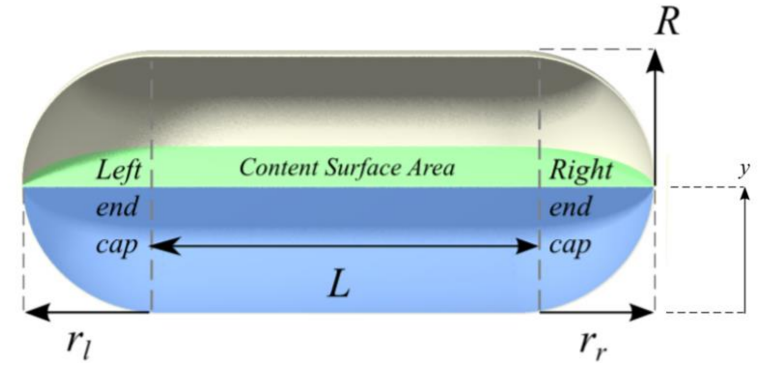

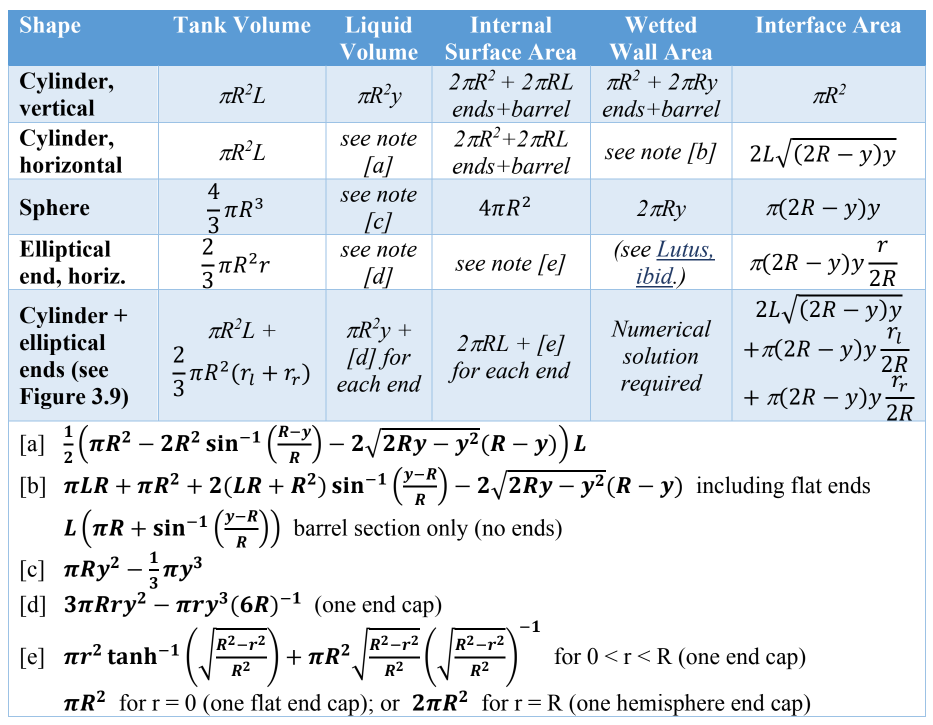